In [1]:
%load_ext autoreload
%autoreload 2
import osmnx as ox
import torch as th
import networkx as nx
import dgl

Using backend: pytorch


In [2]:
#G_original = ox.graph_from_bbox(37.704811, 37.427103, 127.183239, 126.763642, network_type='drive')
G_simplified =ox.load_graphml('data/seoul_rectangular_drive_network_simplified_with_speed.graphml')

In [3]:
# for edge in list(G_simplified.edges(data=True))[9:121]:
#     print(edge)

In [4]:
from speed_info import SpeedInfo
speed_info = SpeedInfo('./data/road_speed_seoul_20181023.csv')
for edge in G_simplified.edges(data=True):
    u, v, data = edge
    data['u'] = u
    data['v'] = v
    data['speed_info_closest_road_index'] = speed_info.road_names_dict[data['speed_info_closest_road']]

/home/juhyeonkim/anaconda3/envs/roadnetwork/lib/python3.7/site-packages/osmnx/plot.py:55: UserWarning: The fig_height parameter(s) have been deprecated and will be removed in the next release. Note, fig_height and fig_width are replaced by the figsize parameter, use that instead. 
  warnings.warn(msg)


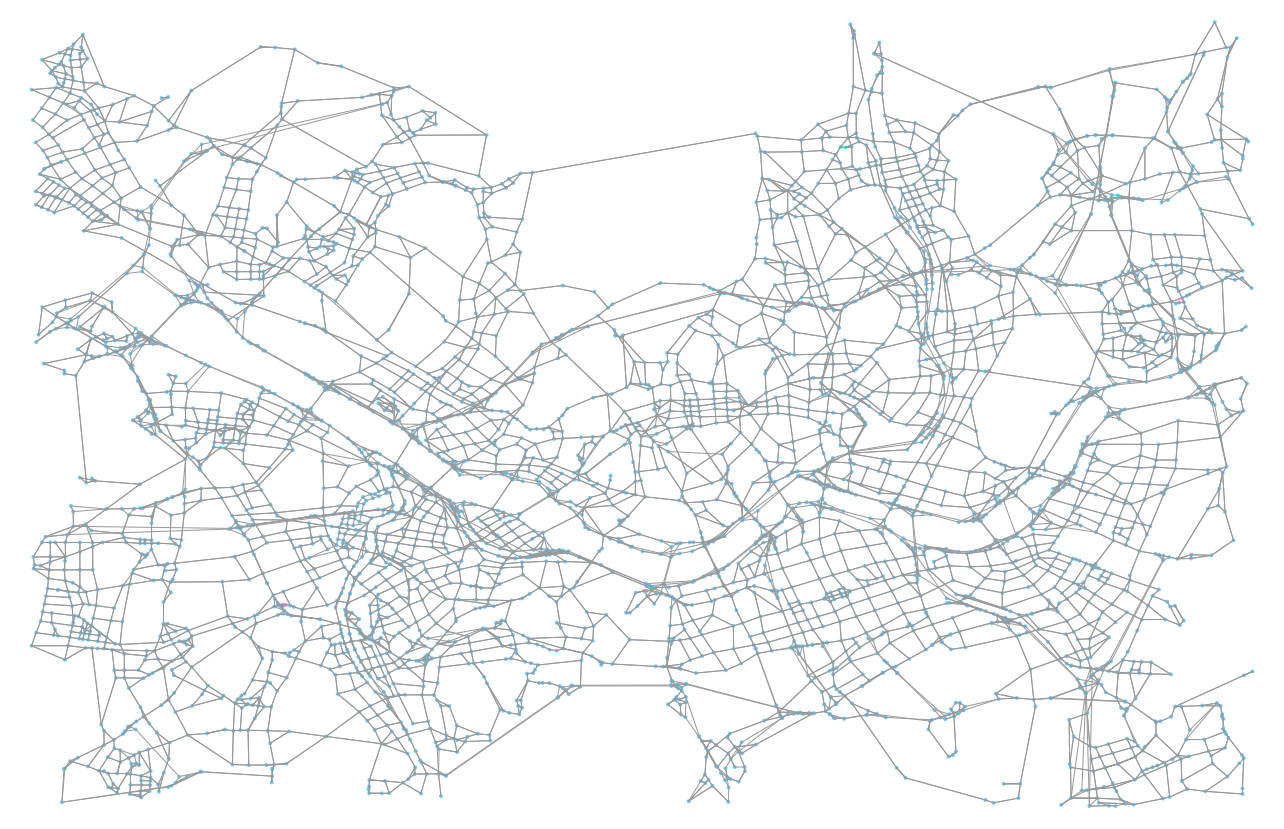

(<Figure size 1638.61x1080 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(G_simplified, fig_height=15)

In [6]:
g = dgl.DGLGraph()
g.from_networkx(G_simplified, edge_attrs=['length', 'u', 'v', 'speed_info_closest_road_index'])
g_line = g.line_graph(shared=True)
print(g_line.number_of_edges())

45114


In [7]:
# from driver_initializer import *
# from call_generator import *
# from data_reader.speed_reader import SpeedInfo

# driver_initializer = BootstrapDriverInitializer('./data/idle_driver_seoul_road_uv_20181023.csv')
# call_generator = BootstrapCallGenerator('./data/calls_seoul_road_uv_20181023.csv')
# total_driver_number_per_time = TotalDriverCount('./data/total_driver_seoul_per_time_mean.csv')

In [8]:
TRAIN_EPOCH = 5
TRAIN_TIME_STEPS = 1438 

common_parameters = {
    "graph_data": 'data/seoul_rectangular_drive_network_simplified_with_speed.graphml',
    "call_generator_data": './data/calls_seoul_road_uv_20181023.csv',
    "driver_initializer_data": './data/idle_driver_seoul_road_uv_20181023.csv',
    "total_driver_number_per_time_data": './data/total_driver_seoul_per_time_mean.csv',
    "speed_info_data": './data/road_speed_seoul_20181023.csv',
    "name":'seoul_with_speed',
    "consider_speed": True,
    "epochs": TRAIN_EPOCH, 
    "time_steps": TRAIN_TIME_STEPS,
    "log_save_folder": 'train_log_seoul_20201224_max',
    "model_save_folder": 'model_data_20201224_max',
    "write_log": True,
    "save_model": True,
    "verbos": False
}

In [9]:
# kwargs_list = []
# kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":0, "epsilon_min":0.1})
# kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":1, "epsilon_min":0.1})
# #kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":2})
# #kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":3})
# kwargs_list.append({"model_type":'gcn', "strategy": 1, "gpu_id":2, "policy_pow":1.5})
# kwargs_list.append({"model_type":'gat', "strategy": 1, "gpu_id":3, "policy_pow":1.5})
# kwargs_list.append({"model_type":'gcn', "strategy": 3, "gpu_id":4, "temperature":1.0, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gat', "strategy": 3, "gpu_id":5, "temperature":1.0, "do_epsilon_exploration": False})

In [10]:
# kwargs_list = []
# kwargs_list.append({"model_type":'gcn', "strategy": 3, "gpu_id":0, "temperature":0.02, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gat', "strategy": 3, "gpu_id":1, "temperature":0.02, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gcn', "strategy": 3, "gpu_id":2, "temperature":0.05, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gat', "strategy": 3, "gpu_id":3, "temperature":0.05, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gcn', "strategy": 3, "gpu_id":4, "temperature":0.1, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gat', "strategy": 3, "gpu_id":5, "temperature":0.1, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gcn', "strategy": 3, "gpu_id":6, "temperature":0.2, "do_epsilon_exploration": False})
# kwargs_list.append({"model_type":'gat', "strategy": 3, "gpu_id":7, "temperature":0.2, "do_epsilon_exploration": False})

In [11]:
kwargs_list = []

kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":0, "epsilon_min":0.01})
kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":1, "epsilon_min":0.01})
kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":2, "epsilon_min":0.02})
kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":3, "epsilon_min":0.02})
kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":4, "epsilon_min":0.05})
kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":5, "epsilon_min":0.05})
kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":6, "epsilon_min":0.1})
kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":7, "epsilon_min":0.1})
kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":0, "epsilon_min":0.2})
kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":1, "epsilon_min":0.2})
kwargs_list.append({"model_type":'gcn', "strategy": 0, "gpu_id":2, "epsilon_min":0.5})
kwargs_list.append({"model_type":'gat', "strategy": 0, "gpu_id":3, "epsilon_min":0.5})

In [ ]:
from main import *
common_parameters['driver_coefficient'] = 0.5
train_using_multiprocessing(common_parameters, kwargs_list)

Train started
Driving drivers at the first 2347
City initialized with total 12443 drivers
Driving drivers at the first 2347
City initialized with total 12443 drivers
Driving drivers at the first 2347
City initialized with total 12443 drivers
Driving drivers at the firstDriving drivers at the first  23472347

City initialized with total 12443 drivers
City initialized with total 12443 drivers
Driving drivers at the first 2347
Driving drivers at the first 2347
City initialized with total 12443 drivers
City initialized with total 12443 drivers
Driving drivers at the first 2347
City initialized with total 12443 drivers
Driving drivers at the first 2347
Driving drivers at the first 2347
City initialized with total 12443 drivers
Driving drivers at the firstCity initialized with total 12443 drivers
 2347
Driving drivers at the first 2347
City initialized with total 12443 driversCity initialized with total 12443 drivers

hit rate so far: 0.9429
hit rate so far: 0.9429
hit rate so far: 0.9429
hi

In [ ]:
# from main import *
# city = City(g_line, call_generator, driver_initializer, total_driver_number_per_time=total_driver_number_per_time, 
#             speed_info = speed_info, name='seoul_with_speed', driver_coefficient=0.5, consider_speed = True, 
#             verbose=True, after_action_random=False)
# #dqn_agent_gcn = DQNAgent(city, model_type='gcn', strategy=0)
# dqn_agent_gat = DQNAgent(city, model_type='gat', strategy=0)
# TEST_EPOCH = 2
# TRAIN_EPOCH = 5
# TEST_TIME_STEPS = 1438
# TRAIN_TIME_STEPS = 1438 

In [ ]:
#evaluate(city, ProportionalAgent(city, proportional='order', policy_pow=1.5), epochs = TEST_EPOCH, time_steps=TEST_TIME_STEPS)

In [ ]:
#error_file = open('%s/error_log_gat.txt'% log_save_folder, 'w')

In [ ]:
# try:
#     train(city, dqn_agent_gcn, epochs = TRAIN_EPOCH, time_steps=TRAIN_TIME_STEPS, write_log=True, save_model=True, log_save_folder=log_save_folder, model_save_folder=model_save_folder)
# except Exception as e:
#     error_file.write(str(e))
#     error_file.flush()

In [ ]:
# try:
#     with torch.no_grad():
#         evaluate(city, dqn_agent_gcn, epochs = TEST_EPOCH, time_steps=TEST_TIME_STEPS, save_folder=log_save_folder)
# except Exception as e:
#     error_file.write(str(e))
#     error_file.flush()

In [ ]:
# try:
#     train(city, dqn_agent_gat, epochs = TRAIN_EPOCH, time_steps=TRAIN_TIME_STEPS, write_log=True, save_model=True, log_save_folder=log_save_folder, model_save_folder=model_save_folder)
# except Exception as e:
#     error_file.write(str(e))
#     error_file.flush()

In [ ]:
# try:
#     with torch.no_grad():
#         evaluate(city, dqn_agent_gat, epochs = TEST_EPOCH, time_steps=TEST_TIME_STEPS, save_folder=log_save_folder)
# except Exception as e:
#     error_file.write(str(e))
#     error_file.flush()

In [ ]:
#dqn_agent_gat.save_model("asdf1234")

In [ ]:
# try:
#     with torch.no_grad():
#         evaluate(city, dqn_agent_gat, epochs = TEST_EPOCH, time_steps=TEST_TIME_STEPS, load_model='seoul_with_speed_dqn_gcn_max_20200203_235155_model_data',save_folder=save_folder)
        
# except Exception as e:
#     error_file.write(str(e))
#     error_file.flush()